<B>LETSGROWMORE VIRTUAL INTERNSHIP PROGRAM DATA SCIENCE INTERNSHIP TASKS

<B>NAME:-SAI KALYAN PRANEETH VELPURI

<B>Task 1 ADVANCED LEVEL :- HAND WRITTEN DIGIT CLASSIFICATION USING MNIST

Objective :- hand written digit recognization using MNIST(Modified National Institute of Standards and Technology database)
    
Model used :- deep learning techniques

Importing libraries

11490434/11490434 [==============================] - 0s 0us/step


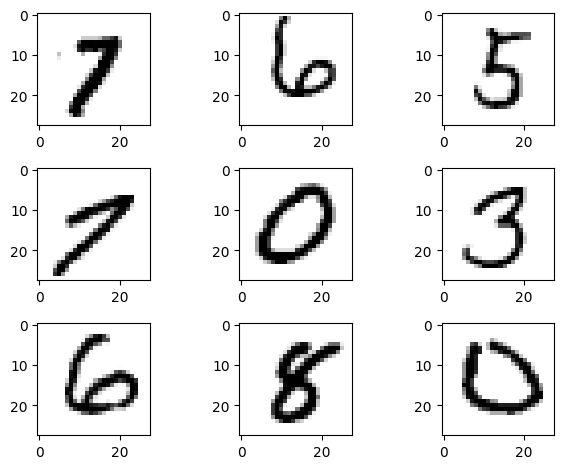

In [ ]:
# importing libraries
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
#loading dataset
(train_X, train_y), (val_X, val_y) = mnist.load_data()

#normalizing the dataset
train_X, val_X = train_X/255, val_X/255

# visualizing 9 rndom digits from the dataset
for i in range(331,340):
    plt.subplot(i)
    a = np.random.randint(0, train_X.shape[0], 1)
    plt.imshow(train_X[a[0]], cmap = plt.get_cmap('binary'))

plt.tight_layout()
plt.show()

In [ ]:
# importing the libraries
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

#defining function for building the model
def create_model(input_shape = (28,28,1)):
    model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Flatten(),
    layers.Dense(units = 54, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')])
    
    return model

In [ ]:
def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:

def fitting_model(model, x, y, epoch):
    model.fit(x,y, shuffle = True, epochs = epoch)

In [ ]:

#reshaping the independant variables
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
val_X = val_X .reshape(val_X.shape[0], 28, 28, 1)

#encoding the dependant variable
train_y = np.eye(10)[train_y]
val_y = np.eye(10)[val_y]

#creating model
model = create_model((28,28,1))
#optimizing model
compile_model(model, 'adam', 'categorical_crossentropy')

#training model
history = model.fit(train_X, train_y, validation_data = (val_X, val_y), batch_size = 10, epochs = 10)
model.save("cnn_digitclass.model") #model will be save in root folder to be later called out for prediction

Epoch 1/10
6000/6000 [==============================] - 142s 23ms/step - loss: 0.1139 - accuracy: 0.9639 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 2/10
6000/6000 [==============================] - 137s 23ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0271 - val_accuracy: 0.9902
Epoch 3/10
6000/6000 [==============================] - 136s 23ms/step - loss: 0.0288 - accuracy: 0.9913 - val_loss: 0.0528 - val_accuracy: 0.9856
Epoch 4/10
6000/6000 [==============================] - 131s 22ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0289 - val_accuracy: 0.9907
Epoch 5/10
6000/6000 [==============================] - 136s 23ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 6/10
6000/6000 [==============================] - 135s 23ms/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 0.0287 - val_accuracy: 0.9925
Epoch 7/10
6000/6000 [==============================] - 136s 23ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0

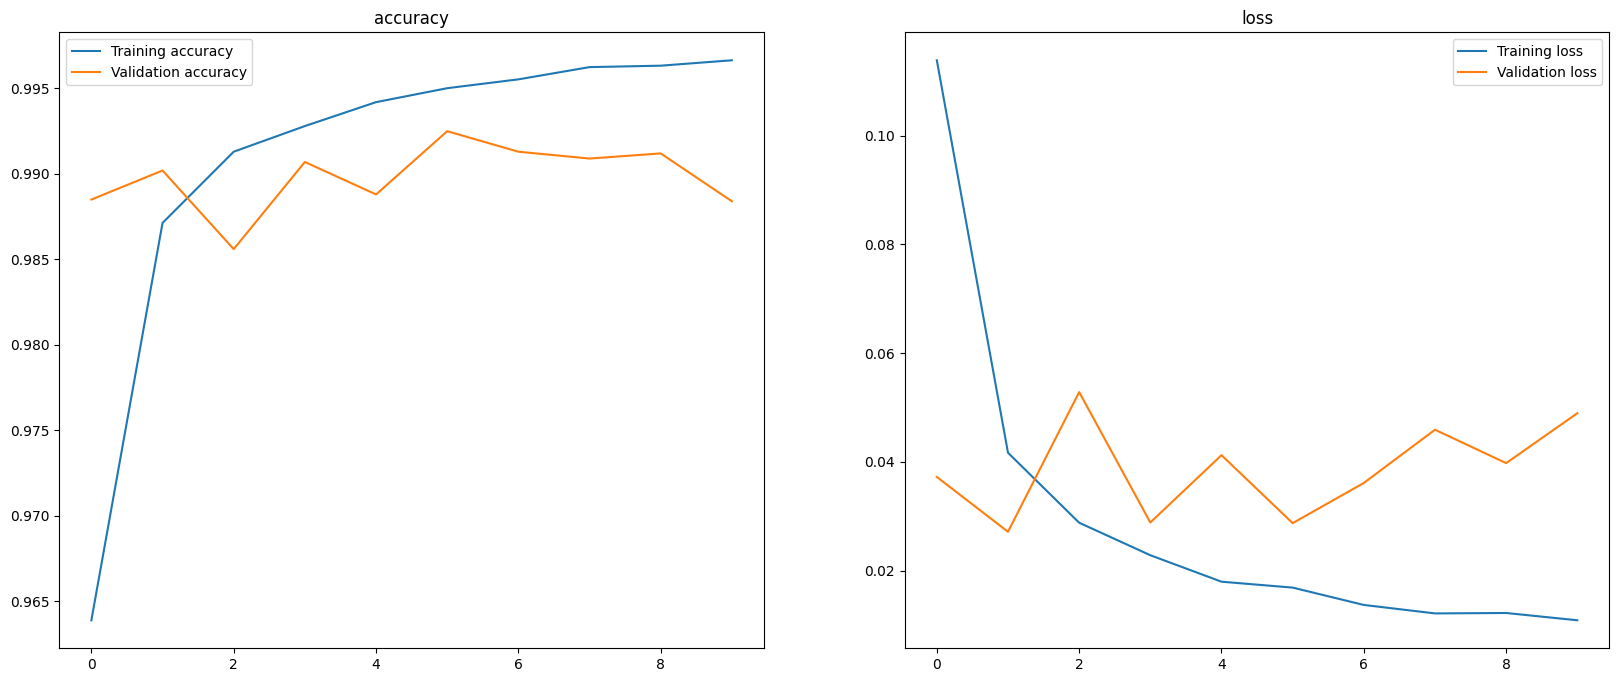

In [ ]:
#model performance visualization
f = plt.figure(figsize=(20,8))

#accuracy
plt1 = f.add_subplot(121)
plt1.plot(history.history['accuracy'], label = str('Training accuracy'))
plt1.plot(history.history['val_accuracy'], label = str('Validation accuracy'))
plt.legend()
plt.title('accuracy')

#loss
plt2 = f.add_subplot(122)
plt2.plot(history.history['loss'], label = str('Training loss'))
plt2.plot(history.history['val_loss'], label = str('Validation loss'))
plt.legend()
plt.title('loss')

plt.show()


.

In [ ]:
#importing and processing input image
import cv2
img = cv2.imread("sample_img.png") #loading input image
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA) #resizing to input shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #chaging to grayscale format
img = cv2.bitwise_not(img) #the color scale was inverted, correcting inverted color scale
img = cv2.Canny(img, 50, 50) # removing noise

predict_data = np.array([img])/255 #changing image data to array
predict_data = predict_data.reshape(1,28, 28, 1) #reshaping to input shape
#predicting the input 
from tensorflow.keras import models
model = models.load_model('cnn_digitclass.model') #loading pre-savedd model
prediction = model.predict(predict_data) #gives array
predicted_number = np.argmax(prediction) #extracts predicted number
print(predicted_number)

1/1 [==============================] - 0s 84ms/step
2
